# Data import and initial Exloration


In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data = pd.read_excel('/content/minisample_500.xlsx')
data = pd.read_csv('/content/lc_loan.csv')
# data = data[:100000]
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

In [184]:
test_data = pd.read_csv('/content/lc_loan_test.csv')
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'early_default', 'return'],
      dtype='object')

In [185]:
set(data.columns)-set(test_data.columns)

{'early_default', 'loan_status', 'return'}

In [186]:
data = data.drop(columns=['id','zip_code','issue_d','earliest_cr_line', 'purpose', 'early_default'])
test_data = test_data.drop(columns=['id','zip_code','issue_d','earliest_cr_line', 'purpose'])

In [187]:
# prompt: no of rows and columns

print(data.shape)
print(test_data.shape)


(933160, 31)
(112858, 29)


In [232]:
  # Summary statistics
summary_stats = data.describe()
print(summary_stats)

          loan_amnt   funded_amnt      int_rate   installment          grade  \
count  9.331600e+05  9.331600e+05  9.331600e+05  9.331600e+05  933160.000000   
mean   2.460965e-17 -1.085505e-16 -1.778717e-16  5.092492e-17       1.416785   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00       1.110324   
min   -1.499378e+00 -1.499076e+00 -1.666384e+00 -1.496592e+00       0.000000   
25%   -7.626892e-01 -7.654055e-01 -7.703043e-01 -7.465639e-01       1.000000   
50%   -3.181893e-01 -3.177423e-01 -1.120108e-01 -2.864732e-01       1.000000   
75%    4.620169e-01  4.532331e-01  5.888340e-01  4.970723e-01       2.000000   
max    3.411880e+00  3.412784e+00  4.758860e+00  4.347132e+00       6.000000   

           sub_grade     emp_length  home_ownership    annual_inc  \
count  933160.000000  933160.000000   933160.000000  9.331600e+05   
mean        9.010464       5.891233        3.043928  2.875187e-16   
std         5.504878       3.568088        1.914841  1.000001e+00   
min

In [188]:
data.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,return
0,5000.0,5000.0,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,0.837,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.172631
1,2400.0,2400.0,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,0.985,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.252361
2,10000.0,10000.0,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,0.210,37.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.223189
3,5000.0,5000.0,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,0.283,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.126442
4,3000.0,3000.0,0.1864,109.43,E,E1,9 years,RENT,48000.0,Source Verified,...,0.875,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,0.313045


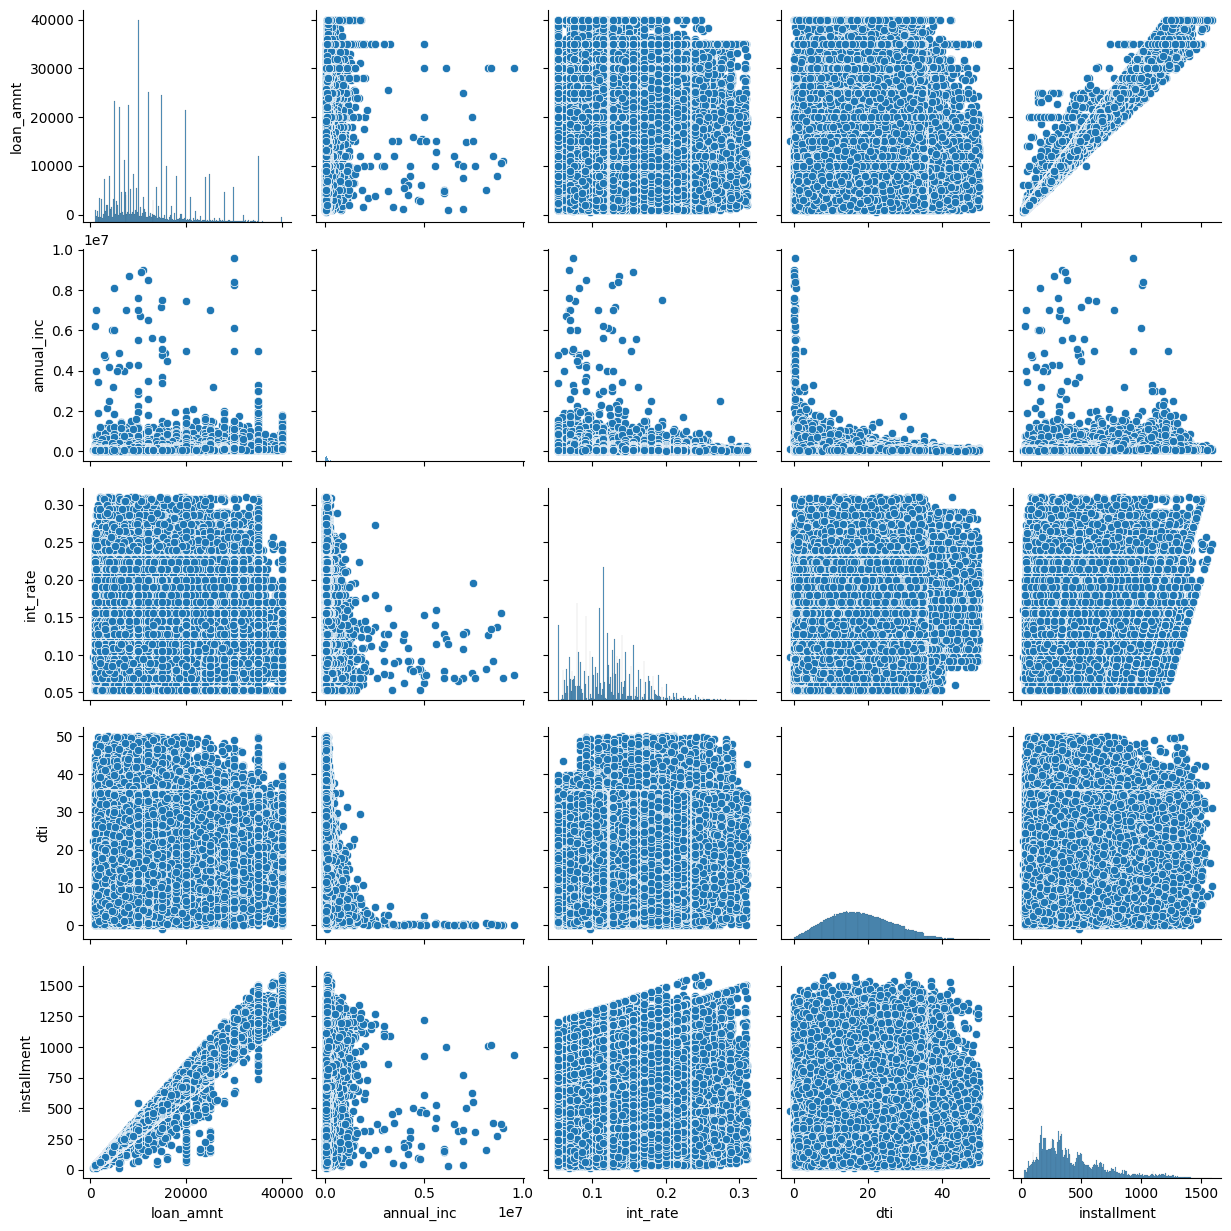

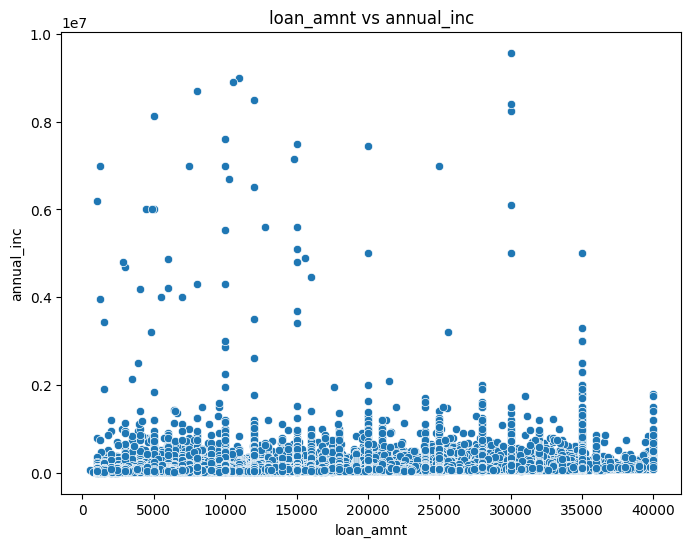

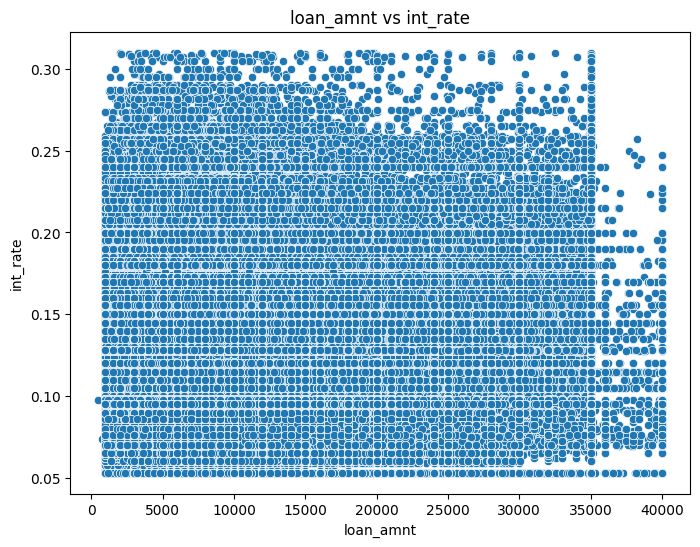

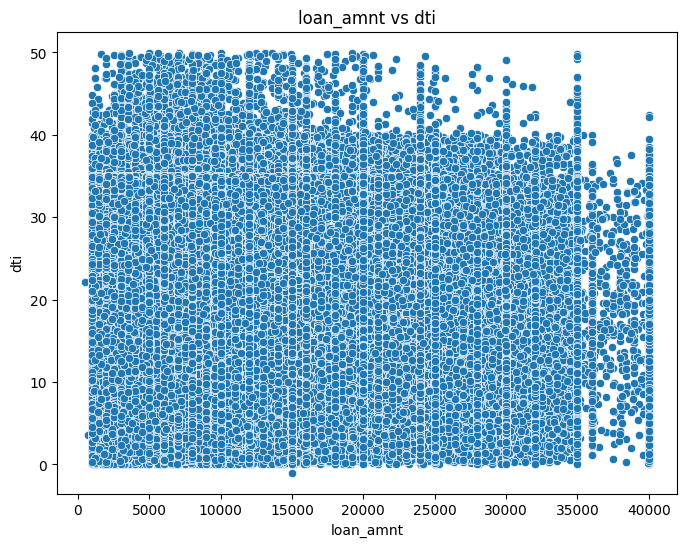

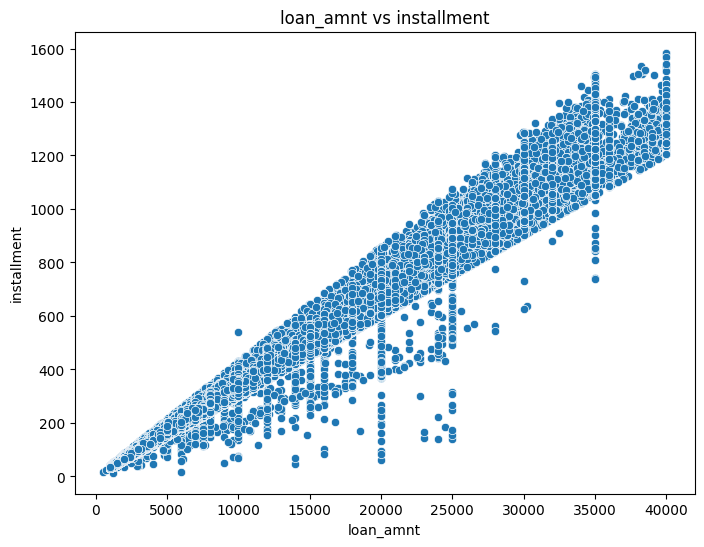

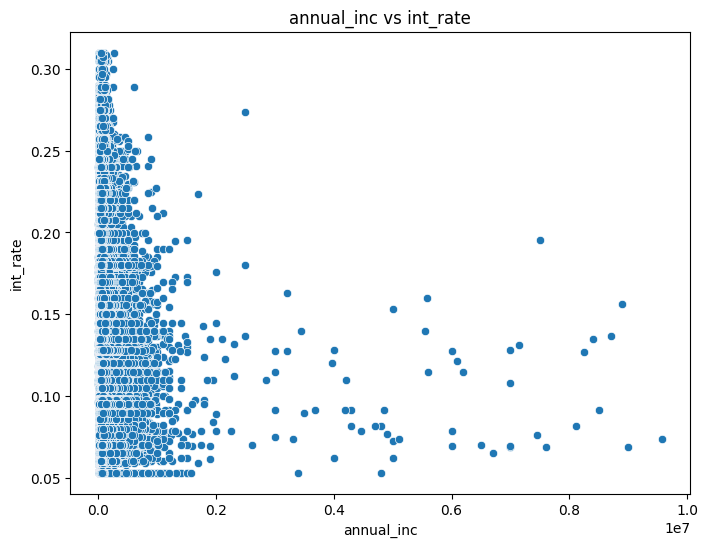

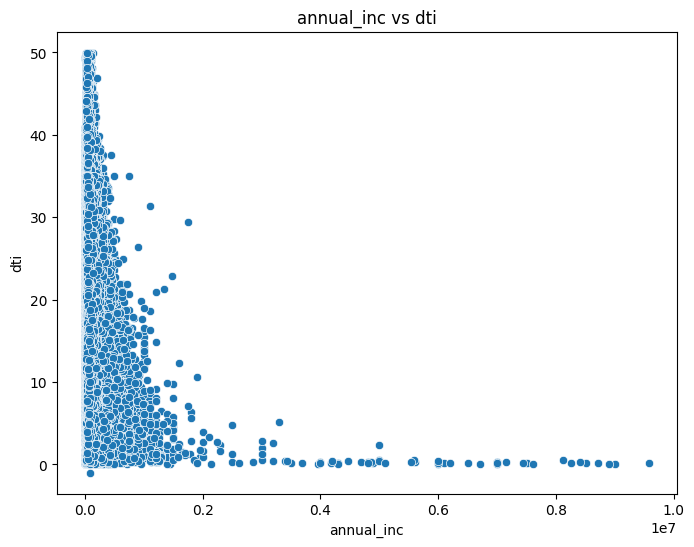

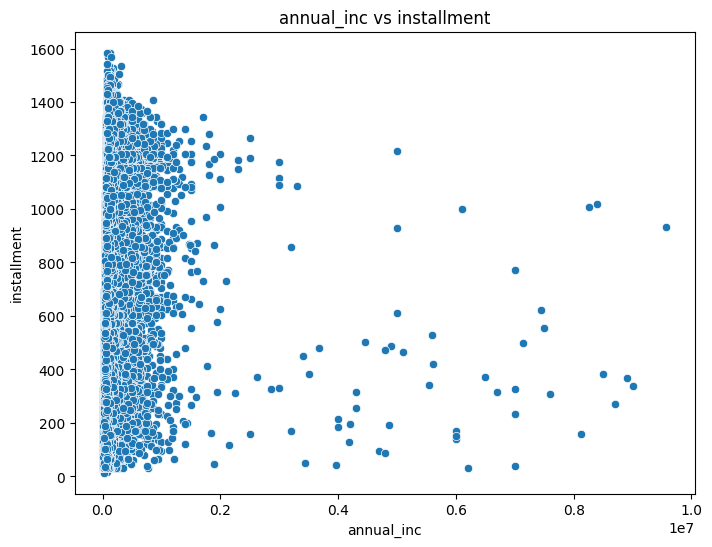

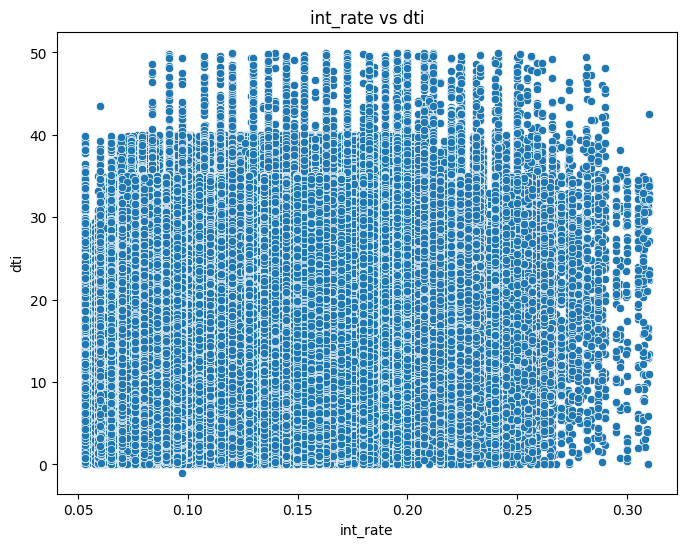

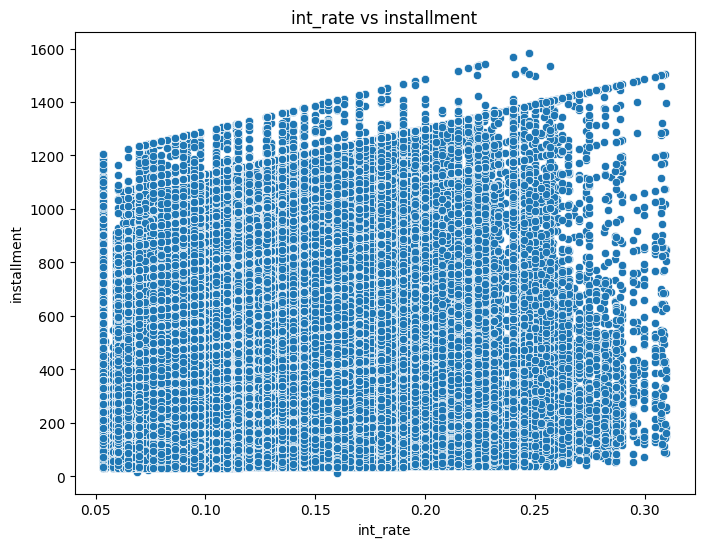

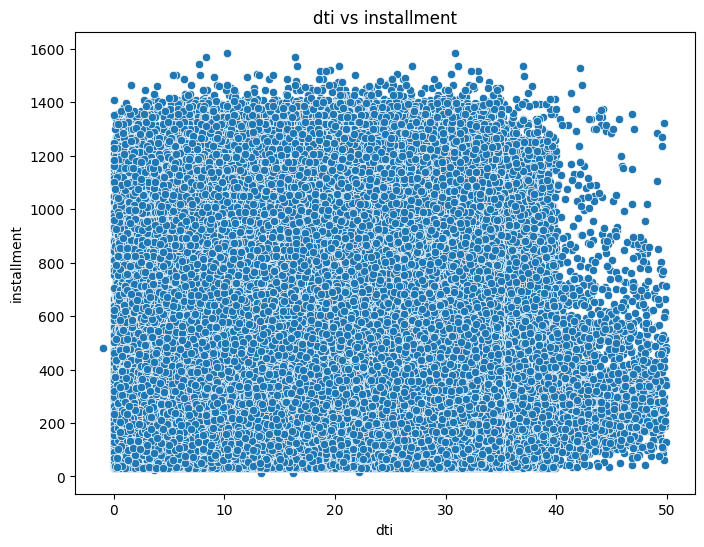

In [189]:
# Scatter plots

# Create a list of key variables for scatterplots
key_variables = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'installment']

# Create a pairplot for the key variables
sns.pairplot(data[key_variables])
plt.show()


# Create individual scatterplots for specific variable pairs
for i in range(len(key_variables)):
    for j in range(i + 1, len(key_variables)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=key_variables[i], y=key_variables[j], data=data)
        plt.title(f'{key_variables[i]} vs {key_variables[j]}')
        plt.show()


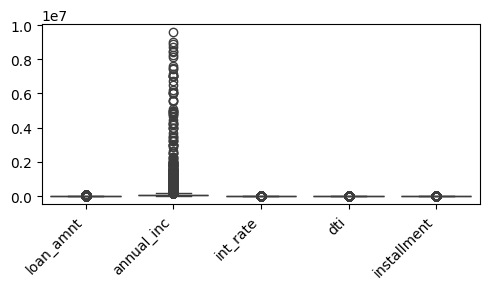

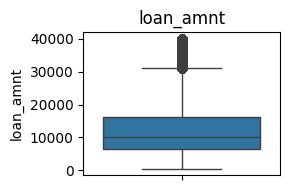

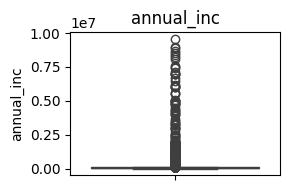

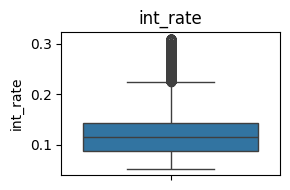

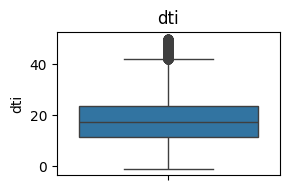

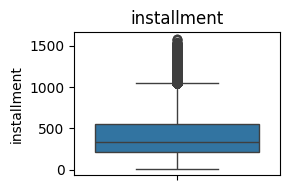

In [190]:
# Box plots for key variables
plt.figure(figsize=(5, 3))  # Set a smaller figure size
sns.boxplot(data=data[key_variables])
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Individual box plots for better visualization
for col in key_variables:
    plt.figure(figsize=(3,2)) # Smaller figure size
    sns.boxplot(y=data[col]) # Use 'y' argument for vertical box plot
    plt.title(col)
    plt.tight_layout()
    plt.show()

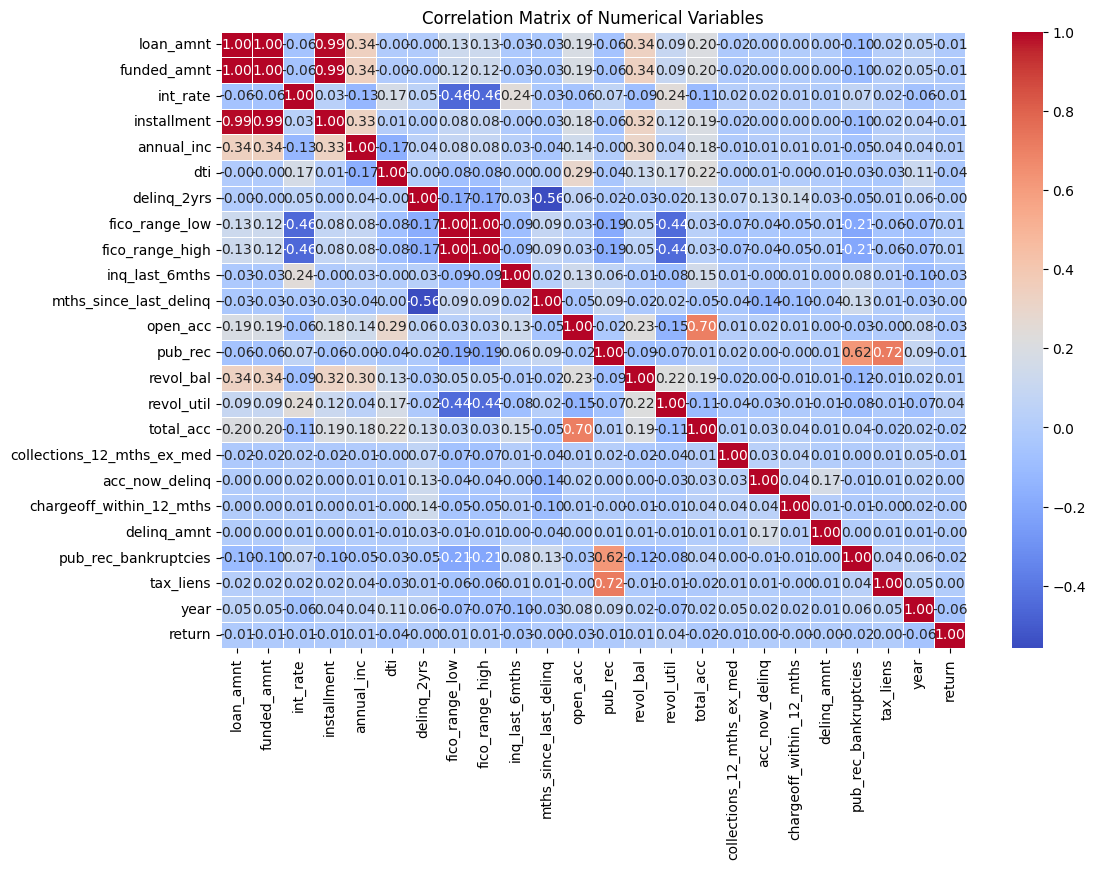

In [191]:
# Step 1: Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Step 2: Compute the correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Data Cleaning and preprocessing

In [193]:
# Drop the 'mths_since_last_delinq' column since missing ~50%
data = data.drop('mths_since_last_delinq', axis=1)

In [194]:
import numpy as np
import pandas as pd

# Function to convert emp_length to numeric values
def convert_emp_length(emp_length):
    if pd.isnull(emp_length):  # Handle NaN values
        return np.nan
    emp_length = str(emp_length)  # Convert to string to avoid AttributeError
    if emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    elif emp_length.isdigit():  # Directly return if it's already a number
        return int(emp_length)
    else:
        return int(emp_length.split()[0])  # Extract the numeric part if formatted as "X years"

# Apply the conversion function to the emp_length column
data['emp_length'] = data['emp_length'].apply(convert_emp_length)
test_data['emp_length'] = test_data['emp_length'].apply(convert_emp_length)

# Fill missing values using the median
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
test_data['emp_length'].fillna(test_data['emp_length'].median(), inplace=True)

# Example loan status conversion (modify if your labels are different)
loan_status_mapping = {
    "Fully Paid": 0,
    "Charged Off": 1,
    "Default": 1,  # Optional: If your dataset has "Default" status, treat it as Charged Off
    "Late (31-120 days)": 1,  # Optional: Consider these as high-risk loans
}

# Convert loan_status column
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

# Drop rows where loan_status is still NaN (if there were any unmapped values)
data.dropna(subset=['loan_status'], inplace=True)

# Verify conversion
print(data['loan_status'].value_counts())


# Check results
print(data['emp_length'].head())
print("Missing values after filling:", data['emp_length'].isnull().sum())


<ipython-input-194-6bc3df4ee754>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(data['emp_length'].median(), inplace=True)
<ipython-input-194-6bc3df4ee754>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

loan_status
0    797918
1    135242
Name: count, dtype: int64
0    10.0
1    10.0
2    10.0
3     3.0
4     9.0
Name: emp_length, dtype: float64
Missing values after filling: 0


In [195]:
# prompt: find the missing values of the columns

data.isnull().sum()


,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [196]:
test_data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [197]:
# Drop the 'mths_since_last_delinq' column since missing ~50% for test file
test_data = test_data.drop('mths_since_last_delinq', axis=1)

Correlation between 'loan_amnt' and loan default: -0.009712990904225904


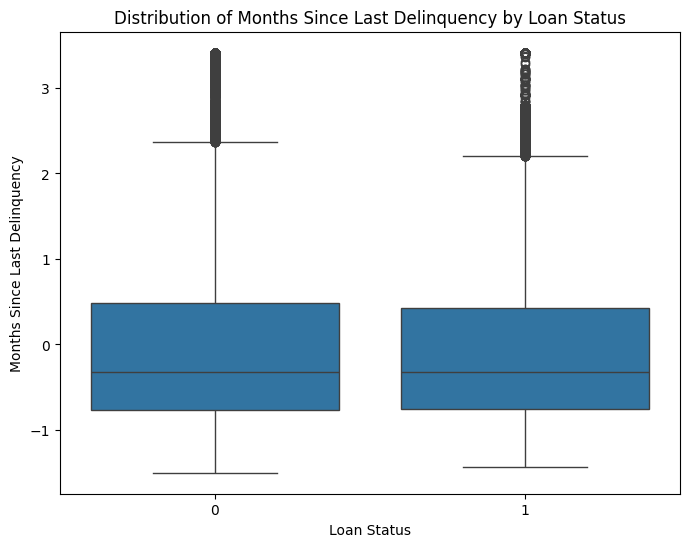

In [235]:
# prompt: correlation between 'mths_since_last_delinq' and loan default

# Fill missing values in 'mths_since_last_delinq' with a large number to represent no delinquency
# data['mths_since_last_delinq'].fillna(999, inplace=True)

# Calculate the correlation between 'mths_since_last_delinq' and the target variable (assuming 'loan_status' represents default)
correlation = data['loan_amnt'].corr(data['return'])

print(f"Correlation between 'loan_amnt' and loan default: {correlation}")

# Visualize the relationship using a boxplot (or other suitable plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Distribution of Months Since Last Delinquency by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Months Since Last Delinquency')
plt.show()


<Axes: >

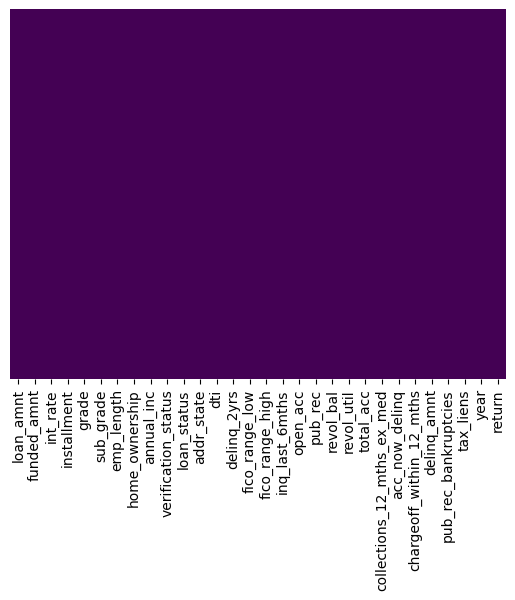

In [200]:
#Heat map which shoes missing values just reconforming it
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [201]:

# If 'loan_status' is categorical (e.g., "Fully Paid", "Charged Off"):
loan_status_counts = data['loan_status'].value_counts().nlargest(10) # Get top 10
loan_status_counts


,count
loan_status,
0,797918
1,135242


In [202]:
data['emp_length'].isnull().sum() #imp length checking nun values


0

In [203]:
# Interaction between emp_length and annual_inc
data['fico_avg'] = (data['fico_range_low'] + data['fico_range_high']) / 2
# data.drop(colummns=['emp_length', 'annual_inc'], inplace=True)

# # Nonlinear term: loan_amnt squared
# data['loan_amnt_squared'] = data['loan_amnt'] ** 2
# # data.drop(columns=['loan_amnt'], inplace=True)

# Nonlinear term: loan_amnt squared
# Convert 'loan_amnt' to numeric before applying the power operation
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')  # Handle potential errors
data['loan_amnt_squared'] = data['loan_amnt'] ** 2
# data.drop(columns=['loan_amnt'], inplace=True)


# Feature engineering

In [204]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
data['grade'] = label_encoder.fit_transform(data['grade'])
data['sub_grade'] = label_encoder.fit_transform(data['sub_grade'])
data['emp_length'] = label_encoder.fit_transform(data['emp_length'])


# One-hot encoding for categorical variables
for col in ['home_ownership', 'verification_status','addr_state','loan_status']:
    data[col] = label_encoder.fit_transform(data[col])

In [205]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
    'tax_liens', 'fico_range_low', 'fico_range_high',
]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [206]:
data.columns
data.shape

(933160, 32)

In [207]:
# prompt: expanding-window regularly
# updating training and validation sets. You need to justify why you chose either approach.



import pandas as pd
from sklearn.model_selection import train_test_split
# ... (your existing code) ...


# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y = data['return']
    X = data.drop(['return', 'loan_status'], axis=1)  # Features
    # y = data[['return',]]  # Target variable

    X_train = X.iloc[:train_index]
    X_val = X.iloc[train_index:]
    y_train = y.iloc[:train_index]
    y_val = y.iloc[train_index:]

    return X_train, X_val, y_train, y_val

# Example usage:
train_size_ratio = 0.8 #Example
X_train, X_val, y_train, y_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (746528, 30)
Validation data shape: (186632, 30)


# Linear regression model

1.   Data: Train and validation
2.   test_data : testing



In [208]:
# prompt: run simple regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ensure X_train_return is properly initialized
X_train_return, y_train_return = X_train.copy(), y_train
X_val_return, y_val_return = X_val.copy(), y_val


# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Make predictions on the training data
y_pred_train = lr_model.predict(X_train)

# Calculate the R-squared for the training data
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"In-sample R-squared: {r2_train}")
print(f"Out-of-sample R-squared: {r2}")


Mean Squared Error: 0.06910541438578989
R-squared: 0.005350830946365681
In-sample R-squared: 0.01289429697182709
Out-of-sample R-squared: 0.005350830946365681


In [209]:
# test_data = pd.read_csv('lc_loan_test.csv')
# Display first few rows
print("Test Dataset Shape:", test_data.shape)

test_data['fico_avg'] = (test_data['fico_range_low'] + test_data['fico_range_high']) / 2

# Nonlinear term: loan_amnt squared
test_data['loan_amnt_squared'] = test_data['loan_amnt'] ** 2
# data.drop(columns=['loan_amnt'], inplace=True)


# test_data = test_data[X_train.columns]

Test Dataset Shape: (112858, 28)


In [210]:
test_data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


ENCODING FOR TEST DATA


In [211]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
test_data['grade'] = label_encoder.fit_transform(test_data['grade'])
test_data['sub_grade'] = label_encoder.fit_transform(test_data['sub_grade'])
test_data['emp_length'] = label_encoder.fit_transform(test_data['emp_length'])

# One-hot encoding for categorical variables
for col in ['home_ownership', 'verification_status','addr_state']:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [212]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'inq_last_6mths', 'open_acc',
    'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
    'tax_liens', 'fico_range_low', 'fico_range_high',
]

# Standardize numerical features
scaler = StandardScaler()
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

In [213]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'fico_avg', 'loan_amnt_squared'],
      dtype='object')

# Logistic Regression

In [217]:


import pandas as pd
from sklearn.model_selection import train_test_split

# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y_l= data[['loan_status']]  # Target variable
    X_l= data.drop(['return', 'loan_status'], axis=1)  # Features
    # y_l = data['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)  # Binary classification
    # test_size=0.2,  # Adjust as needed
    # random_state=42,

    X_l_train = X_l.iloc[:train_index]
    X_l_val = X_l.iloc[train_index:]
    y_l_train = y_l.iloc[:train_index]
    y_l_val = y_l.iloc[train_index:]

    return X_l_train, X_l_val, y_l_train, y_l_val

# Example usage:
train_size_ratio = 0.8 #Example
X_l_train, X_l_val, y_l_train, y_l_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_l_train.shape}")
print(f"Validation data shape: {X_l_val.shape}")


Training data shape: (746528, 30)
Validation data shape: (186632, 30)


In [218]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_l_train_resampled, y_l_train_resampled = smote.fit_resample(X_l_train, y_l_train)
# X_l_val_resampled, y_l_val_resampled = smote.fit_resample(X_l_val, y_l_val)

print("Class distribution after SMOTE:")
# print(pd.Series(y_l_train_resampled).value_counts())  # Check balanced class distribution
print(pd.Series(y_l_train_resampled['loan_status']).value_counts())  # Check balanced class distribution

Class distribution after SMOTE:
loan_status
0    641014
1    641014
Name: count, dtype: int64


In [219]:
# prompt: Fit a logistic regression model to predict loan status (i.e., loan_status).

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Train the model
# logreg_model.fit(X_l_train, y_l_train.values.ravel()) # .values.ravel() to handle potential shape issues

logreg_model.fit(X_l_train_resampled, y_l_train_resampled.values.ravel())  # ✅ Correct dataset used


# Make predictions on the validation set
y_l_pred_logreg = logreg_model.predict(X_l_val)

# Evaluate the model (example using accuracy; choose appropriate metrics)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_l_val, y_l_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy}")

from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

f1 = f1_score(y_l_val, y_l_pred_logreg)  # F1 Score (better for imbalanced classes)
auc = roc_auc_score(y_l_val, logreg_model.predict_proba(X_l_val)[:, 1])  # AUC-ROC Score
# conf_matrix = confusion_matrix(y_l_val, y_l_pred_logreg)  # Confusion Matrix

print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc:.4f}")
# print("Confusion Matrix:\n", conf_matrix)
print(y_l_val[:10])
print(y_l_pred_logreg[:10])


Logistic Regression Accuracy: 0.8407132753225599
F1 Score: 0.0000
AUC-ROC Score: 0.4831
        loan_status
746528            0
746529            0
746530            0
746531            0
746532            0
746533            0
746534            0
746535            0
746536            0
746537            0
[0 0 0 0 0 0 0 0 0 0]


In [220]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score

# Get predicted probabilities instead of fixed predictions
y_l_prob = logreg_model.predict_proba(X_l_val)[:, 1]

# Test different thresholds
thresholds = np.linspace(0.3, 0.7, num=10)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_l_pred_threshold = (y_l_prob >= threshold).astype(int)
    f1 = f1_score(y_l_val, y_l_pred_threshold)

    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}")

    # Select the best threshold
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Decision Threshold: {best_threshold:.2f}")


Threshold: 0.30, F1 Score: 0.2748
Threshold: 0.34, F1 Score: 0.2748
Threshold: 0.39, F1 Score: 0.2748
Threshold: 0.43, F1 Score: 0.2748
Threshold: 0.48, F1 Score: 0.2752
Threshold: 0.52, F1 Score: 0.0000
Threshold: 0.57, F1 Score: 0.0000
Threshold: 0.61, F1 Score: 0.0000
Threshold: 0.66, F1 Score: 0.0000
Threshold: 0.70, F1 Score: 0.0000
Best Decision Threshold: 0.48


In [221]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Apply best threshold for classification
y_l_pred_best = (y_l_prob >= best_threshold).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_l_val, y_l_pred_best)
f1 = f1_score(y_l_val, y_l_pred_best)
auc = roc_auc_score(y_l_val, y_l_prob)
conf_matrix = confusion_matrix(y_l_val, y_l_pred_best)

# Print results
print(f"Logistic Regression - Adjusted Threshold: {best_threshold:.2f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression - Adjusted Threshold: 0.48
Accuracy: 0.1670
F1 Score: 0.2752
AUC-ROC Score: 0.4831
Confusion Matrix:
 [[  1648 155256]
 [   216  29512]]


In [222]:

# Add predicted default probability as a new feature
# Assuming X_l is the DataFrame you want to use for prediction
# and it needs to be scaled

from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported

# Select the features you want to use for prediction (same as in training)
X_l = data.drop([ 'return', 'loan_status'], axis=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_l_scaled = scaler.fit_transform(X_l)  # Fit and transform

# Convert the scaled data back into a DataFrame for easier handling
X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=X_l.columns)

# Now you can use X_l_scaled_df for prediction
data['loan_default_prob'] = logreg_model.predict_proba(X_l_scaled_df)[:, 1]

# Save processed dataset
data.to_csv("processed_loan_data.csv", index=False)
print("Processed dataset saved with predicted default probabilities.")

Processed dataset saved with predicted default probabilities.


In [223]:

# Add predicted default probability as a new feature
# Assuming X_l is the DataFrame you want to use for prediction
# and it needs to be scaled

from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported

# Select the features you want to use for prediction (same as in training)
X_lin = test_data

# Scale the features using StandardScaler
scaler = StandardScaler()
X_l_scaled = scaler.fit_transform(X_lin)  # Fit and transform

# Convert the scaled data back into a DataFrame for easier handling
X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=X_l.columns)

# Now you can use X_l_scaled_df for prediction
test_data['loan_default_prob'] = logreg_model.predict_proba(X_l_scaled_df)[:, 1]

# Save processed dataset
data.to_csv("processed_loan_data.csv", index=False)
print("Processed dataset saved with predicted default probabilities.")

Processed dataset saved with predicted default probabilities.


In [224]:
set(data.columns)-set(test_data.columns)

{'loan_status', 'return'}

In [225]:
X_l.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'fico_avg', 'loan_amnt_squared'],
      dtype='object')

In [226]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'fico_avg', 'loan_amnt_squared',
       'loan_default_prob'],
      dtype='object')

In [227]:
# prompt: expanding-window regularly
# updating training and validation sets. You need to justify why you chose either approach.

import pandas as pd
from sklearn.model_selection import train_test_split

# Function to create training and validation sets with an expanding window
def expanding_window_split(data, train_size):
    data_size = len(data)
    train_index = int(train_size * data_size)

    y = data['return']
    X = data.drop(['return', 'loan_status'], axis=1)  # Features
    # y = data[['return',]]  # Target variable

    X_train = X.iloc[:train_index]
    X_val = X.iloc[train_index:]
    y_train = y.iloc[:train_index]
    y_val = y.iloc[train_index:]

    return X_train, X_val, y_train, y_val

# Example usage:
train_size_ratio = 0.8 #Example
X_train, X_val, y_train, y_val = expanding_window_split(data, train_size_ratio)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (746528, 31)
Validation data shape: (186632, 31)


In [228]:
# prompt: run simple regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ensure X_train_return is properly initialized
X_train_return, y_train_return = X_train.copy(), y_train
X_val_return, y_val_return = X_val.copy(), y_val



# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Make predictions on the training data
y_pred_train = lr_model.predict(X_train)

# Calculate the R-squared for the training data
r2_train = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"In-sample R-squared: {r2_train}")
print(f"Out-of-sample R-squared: {r2}")


Mean Squared Error: 0.06910541436223343
R-squared: 0.005350831285419022
In-sample R-squared: 0.012894296973051
Out-of-sample R-squared: 0.005350831285419022


# Final Predictions and Submission Preparation


In [229]:
# Add predicted default probability as a new feature
# Assuming X_l is the DataFrame you want to use for prediction
# and it needs to be scaled

from sklearn.preprocessing import StandardScaler  # Import StandardScaler if not already imported


# Scale the features using StandardScaler
scaler = StandardScaler()
X_l_scaled = scaler.fit_transform(test_data)  # Fit and transform

# Convert the scaled data back into a DataFrame for easier handling
X_l_scaled_df = pd.DataFrame(X_l_scaled, columns=test_data.columns)

# Now you can use X_l_scaled_df for prediction
test_data['return'] = lr_model.predict(test_data)

# Save processed dataset
# test_data.to_csv("processed_loan_data.csv", index=False)
print("Processed dataset saved with predicted default probabilities.")

Processed dataset saved with predicted default probabilities.


In [230]:
test_data.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'year', 'fico_avg', 'loan_amnt_squared',
       'loan_default_prob', 'return'],
      dtype='object')

In [231]:
# Rename and keep only the 'return' column as a DataFrame
# test_data_submission = test_data.rename(columns={'loan_default_prob': 'return'})[['return']]
test_data_submission = test_data[['return']]

# Insert an 'id' column starting from 1
test_data_submission.insert(0, 'id', range(1, len(test_data_submission) + 1))

# Save to CSV
test_data_submission.to_csv('submission_test.csv', index=False)

 Expanding-window

  chose the expanding window method because it mimics real-life learning—using all past data to continually improve predictions, much like we build on our experiences.
This approach makes the model more robust and adaptable, capturing long-term trends without overfitting to a limited data slice.








Feature engineering and missing values are same like first assignment


Calculating the FICO average consolidates the credit score range into a single, interpretable metric that better represents overall creditworthiness.
The interaction between emp_length and annual_inc was omitted because preliminary tests showed it added complexity without a significant boost in predictive power.






Converting 'loan_amnt' to numeric ensures data consistency and handles non-numeric errors gracefully during computations.
Squaring the variable creates a polynomial feature that captures non-linear effects, enhancing the model's predictive power.

# Reaons for changing them

1. Nonlinear Transformation Change:
I replaced the exponential transformation with a squaring operation on loan amount to avoid excessive amplification and potential numerical instability, while still capturing the essential non-linear effects in loan behavior.

2. Interaction and Feature Consolidation:
I consolidated the FICO range into a single average for clearer interpretability and dropped the emp_length–annual_inc interaction after tests showed it added unnecessary complexity without improving predictive power.


*I used AI* for  developing and tuning supervised learning models—specifically, a logistic regression classifier to predict loan status and a linear regression model for predicting loan returns. Additionally, I applied AI techniques like automated threshold tuning, resampling (SMOTE) for class balancing, and leveraging classification predictions as engineered features to enhance the regression model’s performance.



i faced few problems while generating the processed data for that also i used AI